# Linear Regression and Polynomial Regression

#### *advertising.csv* dataset

In [1]:
#This homework assignment will build three models on the advertising data and evaluate their performance. 
# You can use tools from sklearn to complete this task.

In [2]:
# Source of data: https://www.statlearning.com/s/Advertising.csv

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
advertising = pd.read_csv("Advertising.csv")
advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


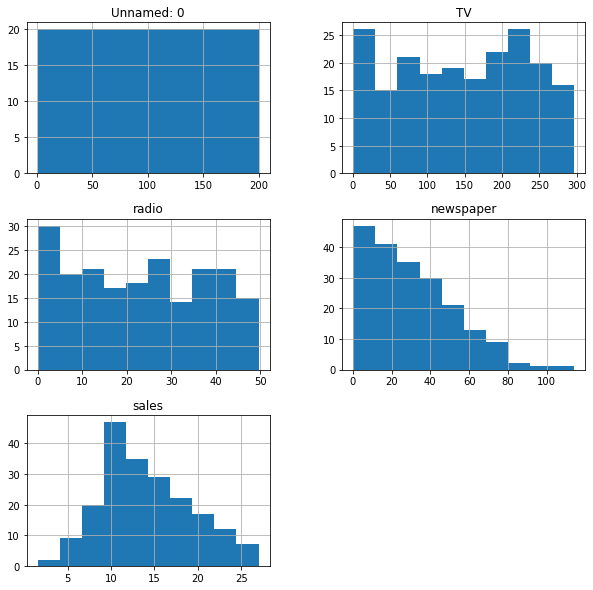

In [5]:
fig = advertising.hist(figsize=(10, 10))

In [6]:
advertising.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


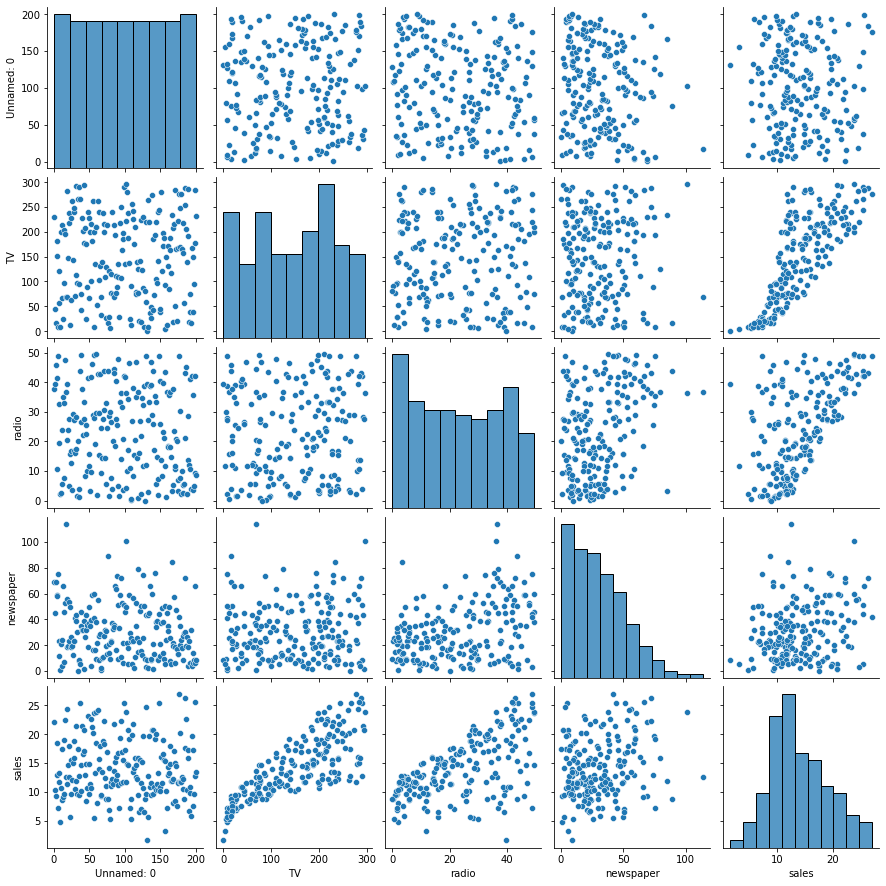

In [7]:
sns.pairplot(advertising)

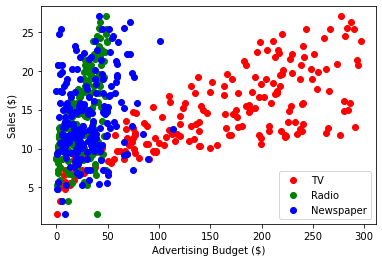

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas dataframe
url = "https://www.statlearning.com/s/Advertising.csv"
data = pd.read_csv(url)

# Create a scatter plot of TV, radio, and newspaper against sales
plt.scatter(data["TV"], data["sales"], color="red", label="TV")
plt.scatter(data["radio"], data["sales"], color="green", label="Radio")
plt.scatter(data["newspaper"], data["sales"], color="blue", label="Newspaper")

# Add axis labels and legend
plt.xlabel("Advertising Budget ($)")
plt.ylabel("Sales ($)")
plt.legend()

# Show the plot
plt.show()

In [9]:
# 1. Use train_test_split to split the data into training set (80%) and test set (20%).

In [10]:
from sklearn.model_selection import train_test_split
training_data, test_data = train_test_split(advertising, test_size=0.2)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

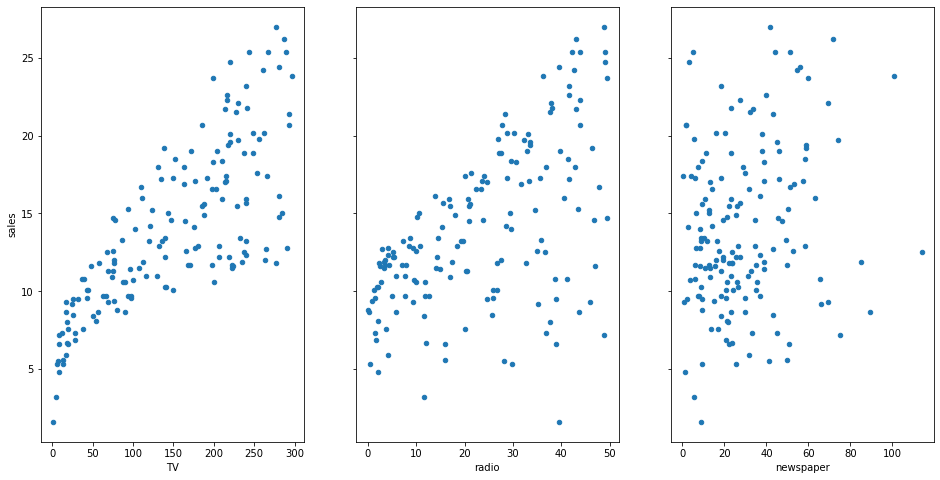

In [11]:
fig,axs= plt.subplots(1,3,sharey=True) # sharey : share same y axis across the plot
training_data.plot(kind="scatter",x='TV',y='sales',ax=axs[0],figsize=(16,8))
training_data.plot(kind="scatter",x='radio',y='sales',ax=axs[1],figsize=(16,8))
training_data.plot(kind="scatter",x='newspaper',y='sales',ax=axs[2],figsize=(16,8))

In [12]:
# 2. Build a multilinear regression model with 'TV', 'Radio', and 'newspaper' as input variables and 'sales' as output variable.
#    Name the model model_lr. Train the model on the training set and obtain model predictions on the test set.

In [13]:
from sklearn.linear_model import LinearRegression

input_cols = ["TV", "radio", "newspaper"]

model_lr = LinearRegression()

model_lr.fit(training_data[input_cols], training_data[["sales"]]) 

LinearRegression()

In [14]:
print("Theta 0:", model_lr.intercept_)
print("Theta 1 and Theta 2:", model_lr.coef_)

Theta 0: [2.94843438]
Theta 1 and Theta 2: [[ 0.04564725  0.19069245 -0.00548221]]


In [15]:
# Apply the model to provide prediction for Fred
test_data['prediction'] = model_lr.predict(test_data[input_cols])
test_data.head()

<ipython-input-15-e7ad3988c0ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prediction'] = model_lr.predict(test_data[input_cols])


,Unnamed: 0,TV,radio,newspaper,sales,prediction
120,121,141.3,26.8,46.2,15.5,14.255671
106,107,25.0,11.0,29.7,7.2,6.024411
137,138,273.7,28.9,59.7,20.8,20.625812
10,11,66.1,5.8,24.2,8.6,6.939065
121,122,18.8,21.7,50.4,7.0,7.668326


In [16]:
# 3. Build a degree 2 polynomial regression model with 'TV', 'Radio', and 'newspaper' as input variables and 'sales' as output
#    variable. Name the model model_pr2. Train the model on the training set and obtain model predictions on the test set.

In [17]:
# use .to_numpy() function in order to plot pandas data

In [18]:
training_data

,Unnamed: 0,TV,radio,newspaper,sales
112,113,175.7,15.4,2.4,14.1
11,12,214.7,24.0,4.0,17.4
44,45,25.1,25.7,43.3,8.5
125,126,87.2,11.8,25.9,10.6
196,197,94.2,4.9,8.1,9.7
...,...,...,...,...,...
192,193,17.2,4.1,31.6,5.9
165,166,234.5,3.4,84.8,11.9
127,128,80.2,0.0,9.2,8.8
186,187,139.5,2.1,26.6,10.3


In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [20]:
poly_features1 = PolynomialFeatures(degree=2, include_bias=False)
poly_features1.fit(training_data[input_cols])
X_poly = poly_features1.transform(training_data[input_cols])
model_pr2 = LinearRegression()
model_pr2.fit(X_poly, training_data[["sales"]])
print(model_pr2.coef_, model_pr2.intercept_)

[[ 5.24952767e-02  2.04979168e-02  4.33160120e-03 -1.11792884e-04
   1.10613034e-03 -4.42814844e-05  7.30231896e-05  1.65416640e-04
   1.47595596e-05]] [5.04900624]


In [21]:
test_data['prediction'] = model_pr2.predict(poly_features1.transform(test_data[input_cols]))
test_data.head()

<ipython-input-21-9a3ef5a268e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prediction'] = model_pr2.predict(poly_features1.transform(test_data[input_cols]))


,Unnamed: 0,TV,radio,newspaper,sales,prediction
120,121,141.3,26.8,46.2,15.5,15.172461
106,107,25.0,11.0,29.7,7.2,6.992847
137,138,273.7,28.9,59.7,20.8,20.318207
10,11,66.1,5.8,24.2,8.6,8.641763
121,122,18.8,21.7,50.4,7.0,7.321613


In [22]:
# 4. Build a degree 10 polynomial regression model with 'TV', 'Radio', and 'newspaper' as input variables and 'sales' as output
#    variable. Name the model model_pr10. Train the model on the training set and obtain model predictions on the test set.

In [23]:
poly_features2 = PolynomialFeatures(degree=10, include_bias=False)
poly_features2.fit(training_data[input_cols])
X_poly = poly_features2.fit_transform(training_data[input_cols])
model_pr10 = LinearRegression()
model_pr10.fit(X_poly, training_data[["sales"]])
print(model_pr10.coef_, model_pr10.intercept_)

[[-4.67561939e-12 -1.23161180e-12  2.45837482e-12 -6.96199669e-13
   1.99926318e-13  2.42062480e-14 -6.04395710e-13  1.36679841e-13
  -7.96724468e-14  4.85981020e-16  1.71711949e-15  7.07863081e-15
   2.79284660e-14 -2.02729458e-14 -3.28732408e-14  7.82674532e-15
  -7.14714620e-16  9.20676323e-16  5.81349471e-15  6.32092770e-13
   1.66127626e-13  3.52287149e-13  5.07375165e-14  4.90667357e-14
   1.18872468e-13  1.42950611e-14  1.30114296e-14  1.32844988e-14
   3.48727111e-14  4.64940620e-15  3.36977055e-15  2.45290372e-15
   1.85215608e-15  7.86898575e-15  1.50953962e-11  6.74430884e-12
   1.41688062e-11  2.17140712e-12  2.27959073e-12  5.15251721e-12
   5.93876343e-13  6.38126617e-13  6.85499947e-13  1.58045422e-12
   1.92773175e-13  1.81947862e-13  1.66680509e-13  1.64719372e-13
   4.83277304e-13  7.09322801e-14  5.35200332e-14  4.52883032e-14
   3.14613800e-14  1.42288965e-14  1.02740774e-13  1.08681327e-11
   1.67776589e-10  3.44802337e-10  5.82953687e-11  6.20180744e-11
   1.38402

In [24]:
test_data['prediction'] = model_pr10.predict(poly_features2.transform(test_data[input_cols]))
test_data.head()

<ipython-input-24-72c594bb49bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prediction'] = model_pr10.predict(poly_features2.transform(test_data[input_cols]))


,Unnamed: 0,TV,radio,newspaper,sales,prediction
120,121,141.3,26.8,46.2,15.5,-1.159658
106,107,25.0,11.0,29.7,7.2,11.187995
137,138,273.7,28.9,59.7,20.8,5198.569340
10,11,66.1,5.8,24.2,8.6,7.853687
121,122,18.8,21.7,50.4,7.0,232.916121


In [25]:
# 5. Calculate the test MSE of each model using the mean_squared_error function. Which model gives the best MSE?

In [26]:
theta = np.array([3.0516, 0.0443, 0.1876, 0.0037])

list_errors = []

for i in advertising.index:
    x = np.array([1, advertising.loc[i, "TV"], advertising.loc[i, "radio"], advertising.loc[i, "newspaper"]])
    theta_dot_x = theta.dot(x)
    y = advertising.loc[i, "sales"]
    squared_error = (theta_dot_x - y) ** 2
    list_errors.append(squared_error)

print(list_errors)
print("MSE:", np.mean(list_errors))

[2.273008522500005, 4.6764062499999985, 11.429876256100002, 0.5969416643999997, 0.16257024, 32.35505042249999, 0.0015272463999998788, 1.2180653955999992, 0.940434457599999, 3.4929367236000077, 2.0809505024999995, 0.10239360009999815, 3.0085943209000043, 0.768690562499996, 0.3186941209000015, 2.396087284900003, 0.7108176099999995, 1.5549092416000034, 1.6111986489, 0.21967969000000012, 0.014597472400000465, 4.461093136900002, 1.4465353984000007, 0.8698733289000031, 2.122965561599998, 11.743095312399996, 0.005569636899999864, 1.0113922623999998, 0.11705293690000307, 1.3648314276000002, 0.00921408010000009, 0.19348561690000077, 3.4226480016, 1.3707492241000088, 3.6820620769000003, 15.446629248399988, 5.241123422499995, 1.204155075600002, 7.83999999990377e-08, 1.3388341264000012, 0.07686756249999926, 0.04069499289999909, 0.31501278760000084, 0.981664824100001, 0.41610240359999884, 0.0605553663999996, 2.513366329599999, 2.7788223203999958, 2.147016172900001, 1.8323683225, 1.4697197824000046,

In [27]:
predictions_pr2 = model_pr2.predict(poly_features1.transform(test_data[input_cols]))
MSE_pr2 = mean_squared_error(test_data[["sales"]], predictions_pr2)
print("MSE for degree-2 polynomial regression:", MSE_pr2)

MSE for degree-2 polynomial regression: 0.21503922586755192


In [28]:
predictions_pr10 = model_pr10.predict(poly_features2.transform(test_data[input_cols]))
mse = mean_squared_error(test_data[["sales"]], predictions_pr10)
print("MSE for degree-10 polynomial regression:", mse)

MSE for degree-10 polynomial regression: 299743710.61161935


In [29]:
print("model_pr2 has the best MSE ", MSE_pr2)

model_pr2 has the best MSE  0.21503922586755192
